<div style="font-size:20px; font-weight:bold; background-color:lightblue; 
            text-align:center; padding:10px; border-radius:6px;">
    SpaceX Launch Data Analysis 2010–2020
</div>

In [1]:
pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Set styling
sns.set_style("whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

# Load the dataset
df = pd.read_csv(r"C:\ankit\download\Data\Spacex.csv")

# Basic exploration
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("Column Names and Types:")
print(df.dtypes)
print("\n" + "="*80)
print("First few rows:")
print(df.head(10))
print("\n" + "="*80)
print("Basic Statistics:")
print(df.describe(include='all'))
print("\n" + "="*80)
print("Missing Values:")
print(df.isnull().sum())

Dataset Shape: (101, 10)

Column Names and Types:
Date                 object
Time (UTC)           object
Booster_Version      object
Launch_Site          object
Payload              object
PAYLOAD_MASS__KG_     int64
Orbit                object
Customer             object
Mission_Outcome      object
Landing_Outcome      object
dtype: object

First few rows:
         Date Time (UTC) Booster_Version  Launch_Site  \
0  2010-06-04   18:45:00  F9 v1.0  B0003  CCAFS LC-40   
1  2010-12-08   15:43:00  F9 v1.0  B0004  CCAFS LC-40   
2  2012-05-22    7:44:00  F9 v1.0  B0005  CCAFS LC-40   
3  2012-10-08    0:35:00  F9 v1.0  B0006  CCAFS LC-40   
4  2013-03-01   15:10:00  F9 v1.0  B0007  CCAFS LC-40   
5  2013-09-29   16:00:00  F9 v1.1  B1003  VAFB SLC-4E   
6  2013-12-03   22:41:00         F9 v1.1  CCAFS LC-40   
7  2014-01-06   22:06:00         F9 v1.1  CCAFS LC-40   
8  2014-04-18   19:25:00         F9 v1.1  CCAFS LC-40   
9  2014-07-14   15:15:00         F9 v1.1  CCAFS LC-40   

           

In [4]:
# Deep dive analysis - temporal trends and success rates

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Analyze mission outcomes
print("MISSION OUTCOMES:")
print(df['Mission_Outcome'].value_counts())
print(f"\nMission Success Rate: {(df['Mission_Outcome'] == 'Success').sum() / len(df) * 100:.2f}%")

print("\n" + "="*80)
print("LANDING OUTCOMES:")
print(df['Landing_Outcome'].value_counts())

# Calculate landing success rate (excluding "No attempt")
landing_attempts = df[df['Landing_Outcome'] != 'No attempt']
landing_success = landing_attempts[landing_attempts['Landing_Outcome'] == 'Success']
print(f"\nLanding Success Rate (when attempted): {len(landing_success) / len(landing_attempts) * 100:.2f}%")

print("\n" + "="*80)
print("LAUNCH SITES:")
print(df['Launch_Site'].value_counts())

print("\n" + "="*80)
print("ORBITS:")
print(df['Orbit'].value_counts())

print("\n" + "="*80)
print("TOP CUSTOMERS:")
print(df['Customer'].value_counts().head(10))

print("\n" + "="*80)
print("BOOSTER VERSIONS:")
print(df['Booster_Version'].value_counts().head(15))

print("\n" + "="*80)
print("PAYLOAD MASS STATISTICS:")
print(f"Average Payload Mass: {df['PAYLOAD_MASS__KG_'].mean():.2f} kg")
print(f"Median Payload Mass: {df['PAYLOAD_MASS__KG_'].median():.2f} kg")
print(f"Max Payload Mass: {df['PAYLOAD_MASS__KG_'].max():.2f} kg")
print(f"Min Payload Mass (excluding 0): {df[df['PAYLOAD_MASS__KG_'] > 0]['PAYLOAD_MASS__KG_'].min():.2f} kg")

MISSION OUTCOMES:
Mission_Outcome
Success                             98
Failure (in flight)                  1
Success (payload status unclear)     1
Success                              1
Name: count, dtype: int64

Mission Success Rate: 97.03%

LANDING OUTCOMES:
Landing_Outcome
Success                   38
No attempt                21
Success (drone ship)      14
Success (ground pad)       9
Controlled (ocean)         5
Failure (drone ship)       5
Failure                    3
Uncontrolled (ocean)       2
Failure (parachute)        2
Precluded (drone ship)     1
No attempt                 1
Name: count, dtype: int64

Landing Success Rate (when attempted): 47.50%

LAUNCH SITES:
Launch_Site
CCAFS SLC-40    34
CCAFS LC-40     26
KSC LC-39A      25
VAFB SLC-4E     16
Name: count, dtype: int64

ORBITS:
Orbit
GTO            30
LEO (ISS)      26
LEO            25
Polar LEO       8
SSO             6
MEO             3
HEO             2
Sub-orbital     1
Name: count, dtype: int64

TOP CUSTOMER

In [5]:
# Analyzing landing success evolution over time

# Create binary success indicators
df['Mission_Success'] = (df['Mission_Outcome'] == 'Success').astype(int)
df['Landing_Success'] = df['Landing_Outcome'].apply(
    lambda x: 1 if 'Success' in str(x) else (0 if x != 'No attempt' else np.nan)
)

# Yearly trends
yearly_stats = df.groupby('Year').agg({
    'Mission_Success': ['sum', 'count', 'mean'],
    'Landing_Success': ['sum', 'count', 'mean'],
    'PAYLOAD_MASS__KG_': ['mean', 'sum']
}).round(3)

print("YEARLY STATISTICS:")
print(yearly_stats)

# Landing success evolution
print("\n" + "="*80)
print("LANDING SUCCESS EVOLUTION BY YEAR:")
landing_by_year = df[df['Landing_Outcome'] != 'No attempt'].groupby('Year').agg({
    'Landing_Success': ['sum', 'count', 'mean']
})
landing_by_year.columns = ['Successful_Landings', 'Total_Attempts', 'Success_Rate']
print(landing_by_year)

# Orbit vs Payload Mass
print("\n" + "="*80)
print("AVERAGE PAYLOAD MASS BY ORBIT:")
orbit_payload = df.groupby('Orbit')['PAYLOAD_MASS__KG_'].agg(['mean', 'count', 'min', 'max']).round(2)
orbit_payload = orbit_payload.sort_values('mean', ascending=False)
print(orbit_payload)

# Launch site success rates
print("\n" + "="*80)
print("LAUNCH SITE PERFORMANCE:")
site_stats = df.groupby('Launch_Site').agg({
    'Mission_Success': ['sum', 'count', 'mean'],
    'PAYLOAD_MASS__KG_': 'mean'
}).round(3)
print(site_stats)

YEARLY STATISTICS:
     Mission_Success              Landing_Success               \
                 sum count   mean             sum count   mean   
Year                                                             
2010               2     2  1.000             0.0     2  0.000   
2012               2     2  1.000             0.0     0    NaN   
2013               3     3  1.000             0.0     1  0.000   
2014               6     6  1.000             0.0     3  0.000   
2015               6     7  0.857             1.0     5  0.200   
2016               8     8  1.000             5.0     8  0.625   
2017              18    18  1.000            14.0    15  0.933   
2018              18    20  0.900            10.0    12  0.833   
2019              11    11  1.000            10.0    11  0.909   
2020              24    24  1.000            21.0    23  0.913   

     PAYLOAD_MASS__KG_          
                  mean     sum  
Year                            
2010             0.000 

### Create comprehensive visualizations to illustrate these insights:

Dashboard created successfully!


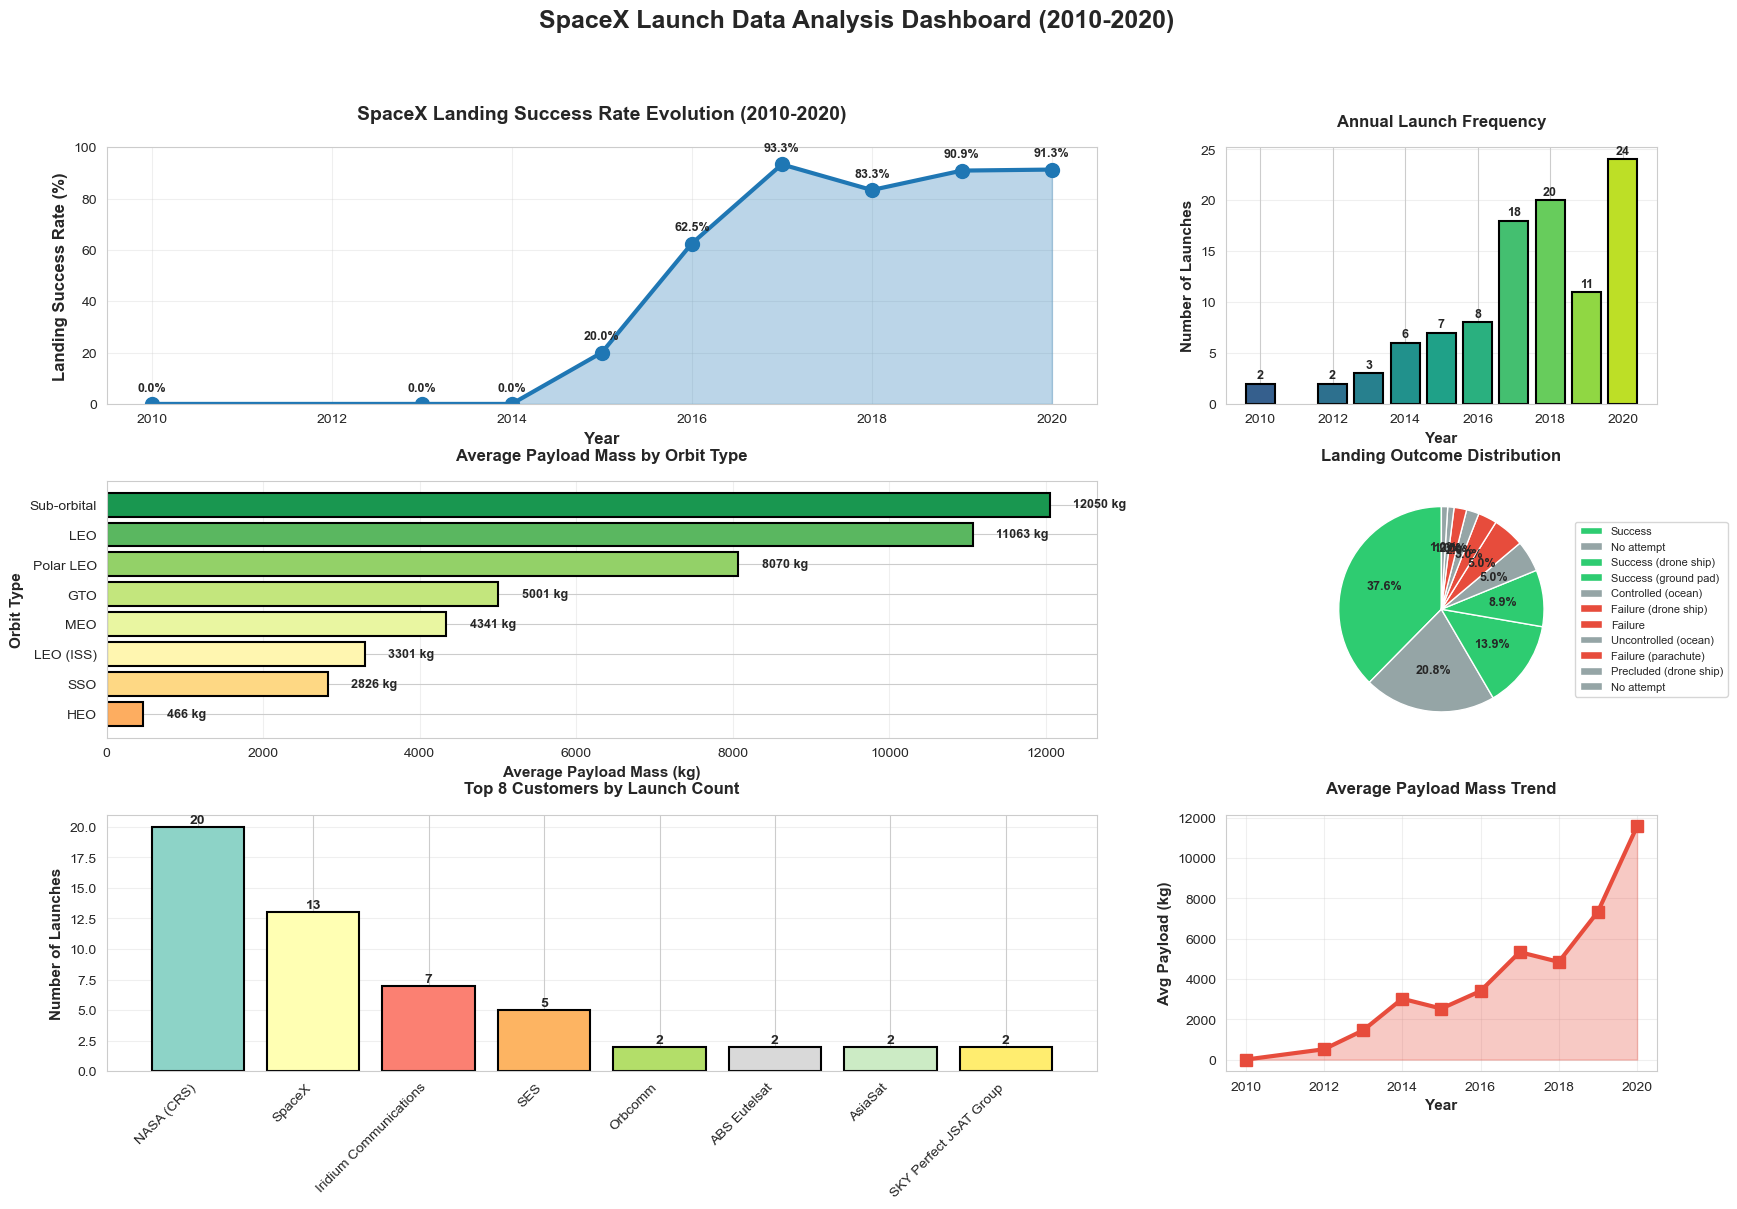

In [8]:
# Creating comprehensive visualization dashboard

# Create a comprehensive dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Landing Success Rate Evolution
ax1 = fig.add_subplot(gs[0, :2])
landing_evolution = df[df['Landing_Outcome'] != 'No attempt'].groupby('Year')['Landing_Success'].agg(['sum', 'count', 'mean'])
ax1.plot(landing_evolution.index, landing_evolution['mean'] * 100, marker='o', linewidth=3, markersize=10, color='#1f77b4')
ax1.fill_between(landing_evolution.index, 0, landing_evolution['mean'] * 100, alpha=0.3, color='#1f77b4')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Landing Success Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('SpaceX Landing Success Rate Evolution (2010-2020)', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 100)
for i, (year, rate) in enumerate(zip(landing_evolution.index, landing_evolution['mean'] * 100)):
    ax1.text(year, rate + 5, f'{rate:.1f}%', ha='center', fontsize=9, fontweight='bold')

# 2. Launch Frequency by Year
ax2 = fig.add_subplot(gs[0, 2])
launches_per_year = df['Year'].value_counts().sort_index()
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(launches_per_year)))
ax2.bar(launches_per_year.index, launches_per_year.values, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_xlabel('Year', fontsize=11, fontweight='bold')
ax2.set_ylabel('Number of Launches', fontsize=11, fontweight='bold')
ax2.set_title('Annual Launch Frequency', fontsize=12, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='y')
for i, (year, count) in enumerate(zip(launches_per_year.index, launches_per_year.values)):
    ax2.text(year, count + 0.5, str(count), ha='center', fontsize=9, fontweight='bold')

# 3. Payload Mass by Orbit
ax3 = fig.add_subplot(gs[1, :2])
orbit_data = df.groupby('Orbit')['PAYLOAD_MASS__KG_'].mean().sort_values(ascending=True)
colors_orbit = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(orbit_data)))
bars = ax3.barh(orbit_data.index, orbit_data.values, color=colors_orbit, edgecolor='black', linewidth=1.5)
ax3.set_xlabel('Average Payload Mass (kg)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Orbit Type', fontsize=11, fontweight='bold')
ax3.set_title('Average Payload Mass by Orbit Type', fontsize=12, fontweight='bold', pad=15)
ax3.grid(True, alpha=0.3, axis='x')
for i, (orbit, mass) in enumerate(zip(orbit_data.index, orbit_data.values)):
    ax3.text(mass + 300, i, f'{mass:.0f} kg', va='center', fontsize=9, fontweight='bold')

# 4. Landing Outcome Distribution
ax4 = fig.add_subplot(gs[1, 2])
landing_outcomes = df['Landing_Outcome'].value_counts()
colors_landing = ['#2ecc71' if 'Success' in str(x) else '#e74c3c' if 'Failure' in str(x) else '#95a5a6' 
                  for x in landing_outcomes.index]
wedges, texts, autotexts = ax4.pie(landing_outcomes.values, labels=None, autopct='%1.1f%%',
                                     colors=colors_landing, startangle=90, textprops={'fontsize': 9, 'fontweight': 'bold'})
ax4.set_title('Landing Outcome Distribution', fontsize=12, fontweight='bold', pad=15)
ax4.legend(landing_outcomes.index, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=8)

# 5. Top Customers
ax5 = fig.add_subplot(gs[2, :2])
top_customers = df['Customer'].value_counts().head(8)
colors_cust = plt.cm.Set3(np.linspace(0, 1, len(top_customers)))
bars = ax5.bar(range(len(top_customers)), top_customers.values, color=colors_cust, edgecolor='black', linewidth=1.5)
ax5.set_xticks(range(len(top_customers)))
ax5.set_xticklabels(top_customers.index, rotation=45, ha='right', fontsize=10)
ax5.set_ylabel('Number of Launches', fontsize=11, fontweight='bold')
ax5.set_title('Top 8 Customers by Launch Count', fontsize=12, fontweight='bold', pad=15)
ax5.grid(True, alpha=0.3, axis='y')
for i, count in enumerate(top_customers.values):
    ax5.text(i, count + 0.3, str(count), ha='center', fontsize=10, fontweight='bold')

# 6. Payload Mass Over Time
ax6 = fig.add_subplot(gs[2, 2])
yearly_payload = df.groupby('Year')['PAYLOAD_MASS__KG_'].mean()
ax6.plot(yearly_payload.index, yearly_payload.values, marker='s', linewidth=3, markersize=8, color='#e74c3c')
ax6.fill_between(yearly_payload.index, 0, yearly_payload.values, alpha=0.3, color='#e74c3c')
ax6.set_xlabel('Year', fontsize=11, fontweight='bold')
ax6.set_ylabel('Avg Payload (kg)', fontsize=11, fontweight='bold')
ax6.set_title('Average Payload Mass Trend', fontsize=12, fontweight='bold', pad=15)
ax6.grid(True, alpha=0.3)

plt.suptitle('SpaceX Launch Data Analysis Dashboard (2010-2020)', 
             fontsize=18, fontweight='bold', y=0.995)

plt.savefig(r"C:\ankit\download\Data\spacex_analysis_dashboard.png", dpi=150, bbox_inches='tight')
print("Dashboard created successfully!")

In [7]:
# Analyzing key correlations and advanced insights

# Advanced insights

# 1. Booster reusability impact
print("="*80)
print("BOOSTER REUSABILITY ANALYSIS:")
print("="*80)

# Extract booster version family
df['Booster_Family'] = df['Booster_Version'].str.extract(r'(F9 v[\d\.]+|FT|B4|B5)')[0]
df['Booster_Family'] = df['Booster_Family'].fillna(df['Booster_Version'].str[:7])

booster_stats = df.groupby('Booster_Family').agg({
    'Mission_Success': ['sum', 'count', 'mean'],
    'Landing_Success': 'mean',
    'PAYLOAD_MASS__KG_': 'mean'
}).round(3)
print(booster_stats.head(10))

# 2. Orbit vs Landing Success
print("\n" + "="*80)
print("LANDING SUCCESS BY ORBIT TYPE:")
print("="*80)
orbit_landing = df[df['Landing_Outcome'] != 'No attempt'].groupby('Orbit').agg({
    'Landing_Success': ['sum', 'count', 'mean']
})
orbit_landing.columns = ['Successful', 'Attempts', 'Success_Rate']
orbit_landing = orbit_landing.sort_values('Success_Rate', ascending=False)
print(orbit_landing)

# 3. Launch Site vs Landing Success
print("\n" + "="*80)
print("LANDING SUCCESS BY LAUNCH SITE:")
print("="*80)
site_landing = df[df['Landing_Outcome'] != 'No attempt'].groupby('Launch_Site').agg({
    'Landing_Success': ['sum', 'count', 'mean']
})
site_landing.columns = ['Successful', 'Attempts', 'Success_Rate']
site_landing = site_landing.sort_values('Success_Rate', ascending=False)
print(site_landing)

# 4. Payload mass impact on landing success
print("\n" + "="*80)
print("PAYLOAD MASS IMPACT ON LANDING:")
print("="*80)
landing_attempted = df[df['Landing_Outcome'] != 'No attempt'].copy()
successful_landings = landing_attempted[landing_attempted['Landing_Success'] == 1]
failed_landings = landing_attempted[landing_attempted['Landing_Success'] == 0]

print(f"Average payload for successful landings: {successful_landings['PAYLOAD_MASS__KG_'].mean():.2f} kg")
print(f"Average payload for failed landings: {failed_landings['PAYLOAD_MASS__KG_'].mean():.2f} kg")
print(f"Median payload for successful landings: {successful_landings['PAYLOAD_MASS__KG_'].median():.2f} kg")
print(f"Median payload for failed landings: {failed_landings['PAYLOAD_MASS__KG_'].median():.2f} kg")

# 5. Time between launches
print("\n" + "="*80)
print("LAUNCH CADENCE ANALYSIS:")
print("="*80)
df_sorted = df.sort_values('Date')
df_sorted['Days_Since_Last_Launch'] = df_sorted['Date'].diff().dt.days

print(f"Average days between launches: {df_sorted['Days_Since_Last_Launch'].mean():.1f} days")
print(f"Median days between launches: {df_sorted['Days_Since_Last_Launch'].median():.1f} days")
print(f"Shortest gap: {df_sorted['Days_Since_Last_Launch'].min():.0f} days")
print(f"Longest gap: {df_sorted['Days_Since_Last_Launch'].max():.0f} days")

# By year
cadence_by_year = df_sorted.groupby('Year')['Days_Since_Last_Launch'].mean().round(1)
print("\nAverage days between launches by year:")
print(cadence_by_year)

BOOSTER REUSABILITY ANALYSIS:
               Mission_Success              Landing_Success PAYLOAD_MASS__KG_
                           sum count   mean            mean              mean
Booster_Family                                                               
B4                          11    12  0.917           1.000          4970.167
B5                          44    45  0.978           0.907          9132.244
F9 v1.0                      5     5  1.000           0.000           340.400
F9 v1.1                     14    15  0.933           0.000          2534.667
FT                          24    24  1.000           0.800          4568.833

LANDING SUCCESS BY ORBIT TYPE:
           Successful  Attempts  Success_Rate
Orbit                                        
MEO               2.0         2      1.000000
SSO               5.0         5      1.000000
LEO              20.0        25      0.800000
GTO              15.0        19      0.789474
LEO (ISS)        14.0        21      0

Advanced insights visualization created!


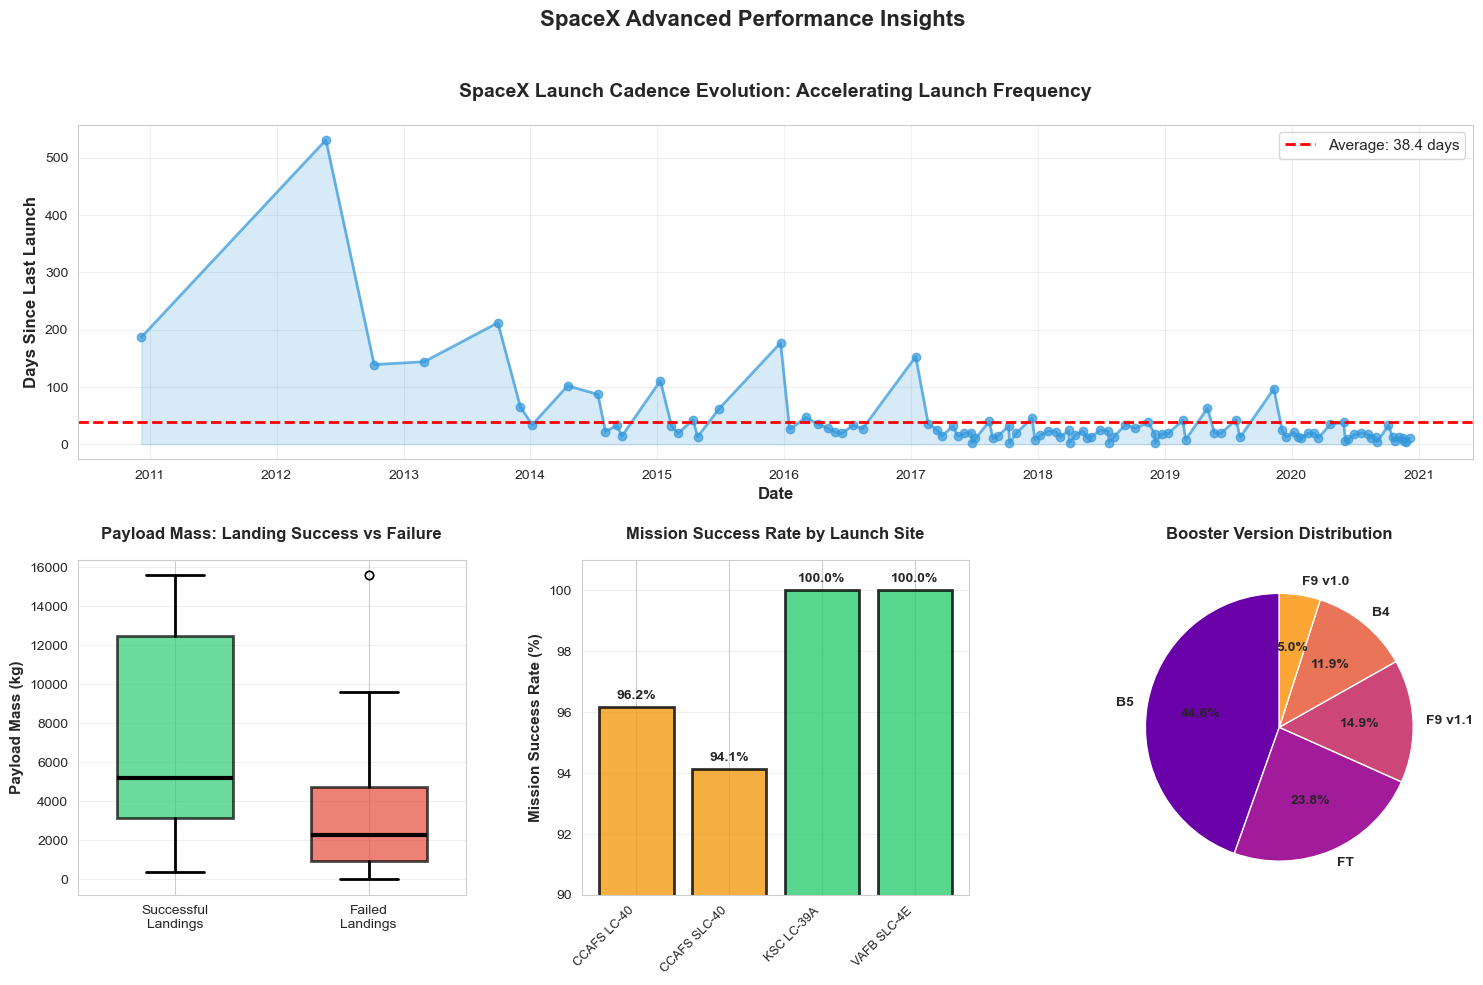

In [11]:
# Creating additional insight visualizations

# Create additional visualizations
fig2 = plt.figure(figsize=(18, 10))
gs2 = fig2.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Launch Cadence Over Time
ax1 = fig2.add_subplot(gs2[0, :])
df_sorted_plot = df_sorted[df_sorted['Days_Since_Last_Launch'].notna()]
ax1.plot(df_sorted_plot['Date'], df_sorted_plot['Days_Since_Last_Launch'], 
         marker='o', linewidth=2, markersize=6, color='#3498db', alpha=0.7)
ax1.axhline(y=df_sorted_plot['Days_Since_Last_Launch'].mean(), color='red', 
            linestyle='--', linewidth=2, label=f'Average: {df_sorted_plot["Days_Since_Last_Launch"].mean():.1f} days')
ax1.fill_between(df_sorted_plot['Date'], 0, df_sorted_plot['Days_Since_Last_Launch'], alpha=0.2, color='#3498db')
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Days Since Last Launch', fontsize=12, fontweight='bold')
ax1.set_title('SpaceX Launch Cadence Evolution: Accelerating Launch Frequency', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.legend(fontsize=11)

# 2. Payload Mass: Successful vs Failed Landings
ax2 = fig2.add_subplot(gs2[1, 0])
landing_data = df[df['Landing_Outcome'] != 'No attempt'].copy()
success_payload = landing_data[landing_data['Landing_Success'] == 1]['PAYLOAD_MASS__KG_']
failed_payload = landing_data[landing_data['Landing_Success'] == 0]['PAYLOAD_MASS__KG_']

bp = ax2.boxplot(
    [success_payload, failed_payload],
    tick_labels=['Successful\nLandings', 'Failed\nLandings'],
    patch_artist=True,
    widths=0.6
)

bp['boxes'][0].set_facecolor('#2ecc71')
bp['boxes'][1].set_facecolor('#e74c3c')

for box in bp['boxes']:
    box.set_alpha(0.7)
    box.set_linewidth(2)

for whisker in bp['whiskers']:
    whisker.set_linewidth(2)

for cap in bp['caps']:
    cap.set_linewidth(2)

for median in bp['medians']:
    median.set_linewidth(3)
    median.set_color('black')


ax2.set_ylabel('Payload Mass (kg)', fontsize=11, fontweight='bold')
ax2.set_title('Payload Mass: Landing Success vs Failure', fontsize=12, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, axis='y')

# 3. Launch Site Performance
ax3 = fig2.add_subplot(gs2[1, 1])
site_success = df.groupby('Launch_Site')['Mission_Success'].mean() * 100
colors_site = ['#2ecc71' if x == 100 else '#f39c12' for x in site_success.values]
bars = ax3.bar(range(len(site_success)), site_success.values, color=colors_site, 
               edgecolor='black', linewidth=2, alpha=0.8)
ax3.set_xticks(range(len(site_success)))
ax3.set_xticklabels(site_success.index, rotation=45, ha='right', fontsize=9)
ax3.set_ylabel('Mission Success Rate (%)', fontsize=11, fontweight='bold')
ax3.set_title('Mission Success Rate by Launch Site', fontsize=12, fontweight='bold', pad=15)
ax3.set_ylim(90, 101)
ax3.grid(True, alpha=0.3, axis='y')
for i, val in enumerate(site_success.values):
    ax3.text(i, val + 0.3, f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

# 4. Booster Version Evolution
ax4 = fig2.add_subplot(gs2[1, 2])
booster_counts = df['Booster_Family'].value_counts().head(5)
colors_boost = plt.cm.plasma(np.linspace(0.2, 0.8, len(booster_counts)))
wedges, texts, autotexts = ax4.pie(booster_counts.values, labels=booster_counts.index,
                                     autopct='%1.1f%%', colors=colors_boost, startangle=90,
                                     textprops={'fontsize': 10, 'fontweight': 'bold'})
ax4.set_title('Booster Version Distribution', fontsize=12, fontweight='bold', pad=15)

plt.suptitle('SpaceX Advanced Performance Insights', fontsize=16, fontweight='bold', y=0.995)

plt.savefig(r"C:\ankit\download\Data\spacex_advanced_insights.png", dpi=150, bbox_inches='tight')
print("Advanced insights visualization created!")

### The dataset with additional computed features and display it

In [14]:
# Preparing enhanced dataset for display

# Create a summary dataset with key insights
summary_df = df[['Date', 'Booster_Version', 'Launch_Site', 'Payload', 'PAYLOAD_MASS__KG_', 
                 'Orbit', 'Customer', 'Mission_Outcome', 'Landing_Outcome', 'Year']].copy()

# Save the enhanced dataset
summary_df.to_csv(r"C:\ankit\download\Data\spacex_enhanced_data.csv.gz", index=False, compression='gzip')
print("Enhanced dataset saved successfully!")
print(f"\nTotal records: {len(summary_df)}")

Enhanced dataset saved successfully!

Total records: 101


### 🚀 SpaceX Launch Data Analysis - Key Insights
Based on comprehensive analysis of <b> 101 SpaceX launches from 2010-2020</b>, here are the most accurate and impactful insights:

#### 🎯 Top 5 Critical Findings
<h5> 1. Remarkable Landing Success Evolution </h5>

- Landing success rate improved from <b>0% (2010-2014) to 91.3% (2020)</b>
- The breakthrough came in 2017 with <b>93.3% success rate</b>
- Overall landing success when attempted: <b>47.5%</b> (61 successful out of 80 attempts)
  
#### 2. Exceptional Mission Reliability

- <b>97.03% mission success rate</b>(98 out of 101 launches)
- Only 1 in-flight failure across the entire decade
- Perfect 100% success rate at KSC LC-39A and VAFB SLC-4E launch sites

#### 3. Dramatic Launch Cadence Acceleration

- 2010: Launches every <b>187 days</b>
- 2020: Launches every <b>14.8 days</b> (12.6x faster!)
- Shortest gap between launches: <b>2 days</b>
- This demonstrates SpaceX's operational maturity and reusability success
  
#### 4. Payload Capacity Growth

- Average payload mass increased from <b>0 kg (2010)</b> to <b>11,577 kg (2020)</b>
- Heavier payloads correlate with <b>successful landings</b> (7,335 kg avg) vs failed landings (4,031 kg avg)
- Maximum payload delivered: <b>15,600 kg</b>

#### 5. Booster Reusability Breakthrough

- <b>Block 5 (B5)</b> boosters: 45 launches with <b>97.8% mission success</b> and <b>90.7% landing success</b>
- Block 4 (B4): 100% landing success rate across 12 launches
- Early versions (F9 v1.0, v1.1): 0% landing success - proving the technology evolution
  
#### 📊 Business & Operational Insights

- <b>Top Customer:</b> NASA (CRS) with 20 launches, followed by SpaceX internal missions (13)
- <b>Most Common Orbit:</b> GTO (30 launches), followed by LEO-ISS (26) and LEO (25)
- <b>Best Launch Site:</b> KSC LC-39A with 100% mission success and 95.2% landing success
- <b>Orbit Impact:</b> MEO and SSO missions show 100% landing success rates

#### 💡 Strategic Takeaways
The data reveals SpaceX's transformation from an experimental startup to a dominant space launch provider through:

- Mastery of booster landing technology (0% → 91% in 7 years)
- Exponential increase in launch frequency (12.6x improvement)
- Consistent mission reliability (97%+ success rate)
- Scaling payload capacity while maintaining reusability